A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
df = pd.read_csv("Euro_2012_stats_TEAM.csv")

df.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

### Transformamos la columna shoting Acurracy en float ya que lo necesitaremos para el futuro

In [112]:
df['Shooting Accuracy'] = df['Shooting Accuracy'].str.rstrip('%').astype('float') / 100.0
df["% Goals-to-shots"] = df["% Goals-to-shots"].str.rstrip('%').astype('float') / 100.0
df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,0.519,0.160,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,0.419,0.129,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,0.500,0.200,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,0.500,0.172,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,0.379,0.065,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,0.478,0.156,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,0.307,0.192,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,0.430,0.075,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,0.250,0.041,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,0.394,0.052,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


## Ejercicio 1

<AxesSubplot:>

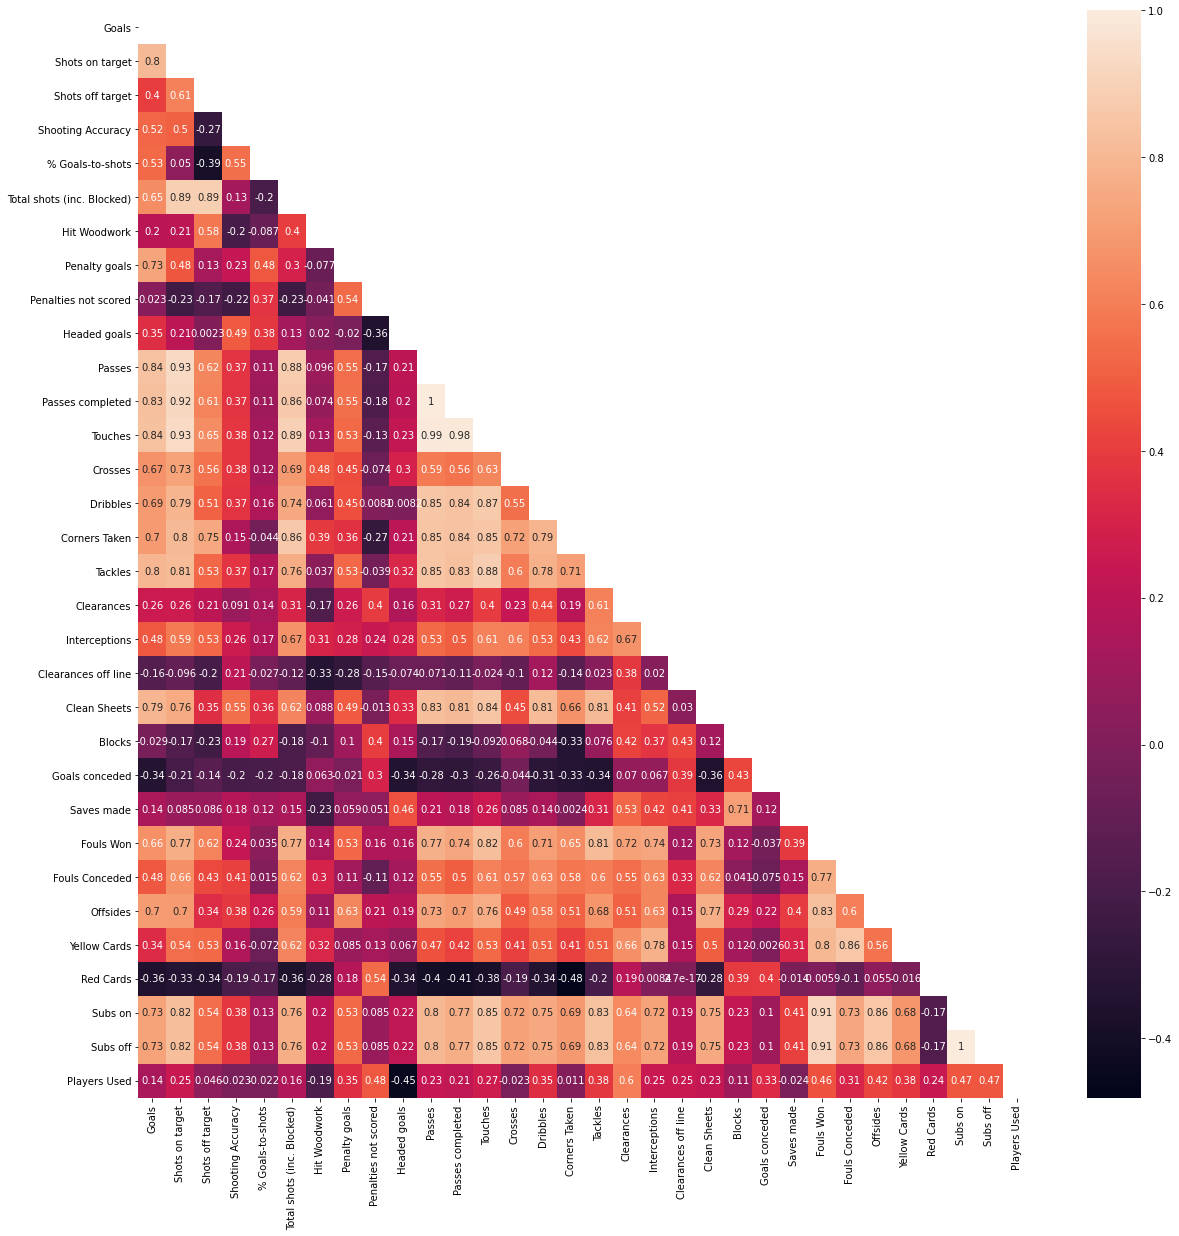

In [113]:
fig, ax = plt.subplots(figsize=(20,20))
matriz = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,mask=matriz)


### En este caso podemos ver las colunas mejor relacionadas, eliminamos las 32 primeras puesto que son la relación que tienen por pare de valores iguales, por otra parte, no he consequido eliminar los pares de valores que se repiten, por lo que cada una aparece dos veces.

In [45]:
c = df.corr().abs()
m = c.unstack()
sorted = m.sort_values(kind="quicksort",ascending=False)
sorted[32:70]

Players Used                Players Used                  1.000000
Passes completed            Passes                        0.997697
Passes                      Passes completed              0.997697
Touches                     Passes                        0.993044
Passes                      Touches                       0.993044
Touches                     Passes completed              0.984324
Passes completed            Touches                       0.984324
Touches                     Shots on target               0.934623
Shots on target             Touches                       0.934623
                            Passes                        0.930337
Passes                      Shots on target               0.930337
Shots on target             Passes completed              0.923242
Passes completed            Shots on target               0.923242
Fouls Won                   Subs off                      0.907719
Subs on                     Fouls Won                     0.90

## Ejercicio 2

In [64]:
X = df["Shooting Accuracy"]
X = np.array(X)
X = X.reshape(-1,1)
y= df["Goals"]
y= np.array(y)

### Regresión lineal

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1) 
lm.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

In [67]:
predictions = lm.predict(X_test)

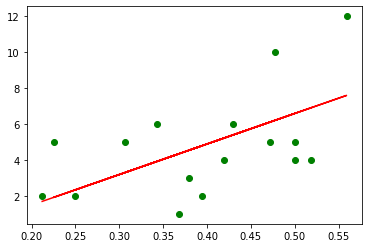

In [68]:
plt.scatter(X, y, color='g')
plt.plot(X, lm.predict(X), color='red')

In [69]:
lm.score(X, y)

0.25793159870439575

### Regresión no lineal con polinomio

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error

In [101]:
degree = 7

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)
print(X_poly)
print(X_poly.shape)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred))

X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))
plt.show()



[[1.00000000e+00 5.59000000e-01 3.12481000e-01 1.74676879e-01
  9.76443754e-02 5.45832058e-02 3.05120121e-02 1.70562147e-02]
 [1.00000000e+00 3.94000000e-01 1.55236000e-01 6.11629840e-02
  2.40982157e-02 9.49469698e-03 3.74091061e-03 1.47391878e-03]
 [1.00000000e+00 4.72000000e-01 2.22784000e-01 1.05154048e-01
  4.96327107e-02 2.34266394e-02 1.10573738e-02 5.21908044e-03]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
  6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03]
 [1.00000000e+00 4.78000000e-01 2.28484000e-01 1.09215352e-01
  5.22049383e-02 2.49539605e-02 1.19279931e-02 5.70158071e-03]
 [1.00000000e+00 2.12000000e-01 4.49440000e-02 9.52812800e-03
  2.01996314e-03 4.28232185e-04 9.07852232e-05 1.92464673e-05]
 [1.00000000e+00 3.43000000e-01 1.17649000e-01 4.03536070e-02
  1.38412872e-02 4.74756151e-03 1.62841360e-03 5.58545864e-04]
 [1.00000000e+00 3.79000000e-01 1.43641000e-01 5.44399390e-02
  2.06327369e-02 7.81980728e-03 2.96370696e-03 1.12324494e-03]


TypeError: 'Series' object is not callable

### SVR

In [92]:
from sklearn.svm import SVR

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
Y_pred = svr.predict(X_test)


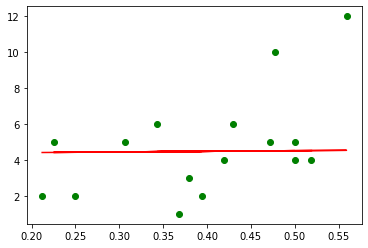

In [100]:
plt.scatter(X, y, color='g')
plt.plot(X, svr.predict(X), color='red')

## Ejercicio 3

In [ ]:
## Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

% de goles por disparo: 40%
Total shots (inc. Blocked): 102
Corners Taken: 5
Passes: 82
Dribbles: 23


In [153]:
y = df["Goals"]
X = df[["% Goals-to-shots","Total shots (inc. Blocked)","Corners Taken","Passes","Dribbles"]]
X_new = pd.DataFrame({'% Goals-to-shots': [0.4], 'Total shots (inc. Blocked)': [102], 'Corners Taken': [5], 'Passes': [82],'Dribbles':[23]})
X_new = np.array(X_new)
X_new = X_new.reshape(1,-1)
X_new


array([[  0.4, 102. ,   5. ,  82. ,  23. ]])

### logistic regression

In [154]:
# L.regresion
from sklearn import model_selection
from sklearn import linear_model
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2,)
model = linear_model.LogisticRegression(max_iter=100)
model.fit(X_train, Y_train)
model.predict(X_new)

C:\Users\34606\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([6], dtype=int64)

### Marcaría 6 goles

### SVM

In [159]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model = svr_rbf.fit(X, y)
print("model.score:", model.score(X, y))
y_prediction = model.predict(X_new)
y_prediction

model.score: 0.99872


array([4.75])

### Marcaría entre 4 y 5 goles

### R.F